# Preprocessing

This note we'll preprocessing our dataset to extract the labels to feed our CNN. The dataset can be find [here](https://susanqq.github.io/UTKFace/).

<img src="images/dataset.png" alt="UTKFace Dataset" width="740" height="180" />


After extract the zip file move all images to folder **data/**


## UTKFace 

UTKFace dataset is a large-scale face dataset with long age span (range from **0 to 116** years old). The dataset consists of over **20,000** face images with annotations of **age**, **gender**, and **ethnicity**. The images cover large variation in pose, facial expression, illumination, occlusion, resolution, etc. This dataset could be used on a variety of tasks, e.g., face detection, age estimation, age progression/regression, landmark localization, etc. 

## Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
from PIL import Image
from sklearn.preprocessing import MinMaxScaler
from glob import glob
from utils.helpers import load, save
import re
%matplotlib inline

## Data Input

In [2]:
def extract_labels(_list_images):
    '''[age]_[gender]_[race]_[date&time]'''
    _list_ret = []
    for name in _list_images:
        features = name.split('_')
        _list_ret.append((features[0], features[1], features[2]))
    return _list_ret

In [3]:
DATA_PATH = 'dataset/'
files = glob(DATA_PATH+'*.jpg')
images = [re.sub('dataset/', '', re.sub(r'.jpg.chip.jpg', '', x)) for x in files]
labels = extract_labels(images)
print(labels[np.random.randint(0, len(images))])
print(len(images))

('9', '0', '2')
23708


In [5]:
def images_to_pkl(files, labels, pos, name, max_batch, callback=None):
    X = []
    y = []
    batch_index = 1
    for index, (path, lbl) in enumerate(zip(files, labels)):
        image = Image.open(path)
        image = image.resize((100,100), Image.LANCZOS)
        data_x = np.array(image, dtype=np.float32)
        data_x /= 255
        data_y = lbl[pos] if callback == None else callback(lbl[pos])
        if data_y == None:
            continue
        X.append(data_x)
        y.append(data_y)
        if index == max_batch*batch_index:
            save({'X': X, 'y': y }, 'data/0{:}.{:}.pkl'.format(batch_index, name))
            X = []
            y = []
            batch_index += 1
    # remaining batch
    if len(X) >= 0:
        save({'X': X, 'y': y }, 'data/0{:}.{:}.pkl'.format(batch_index, name))
        
def describe_data(labels, data):
    y_pos = np.arange(len(labels))
    plt.bar(y_pos, data, align='center')
    plt.xticks(y_pos, labels)
    plt.ylabel('Length')
    plt.title('Data')
    plt.show()

### Data Gender

In [8]:
images_to_pkl(files, labels, 1, 'gender', 5000)

In [9]:
gender_data = glob('data/*.gender.pkl')
batch_gender = load(gender_data[np.random.randint(len(gender_data))])
gender_x, gender_y = len(batch_gender['X']), len(batch_gender['y'])
print(gender_data)
print(gender_x, gender_y)
print(batch_gender['X'][np.random.randint(gender_x)])
print(batch_gender['y'][np.random.randint(gender_y)])

['data/02.gender.pkl', 'data/05.gender.pkl', 'data/03.gender.pkl', 'data/04.gender.pkl', 'data/01.gender.pkl']
5000 5000
[[[0.3019608  0.2627451  0.21568628]
  [0.32156864 0.27450982 0.22745098]
  [0.30588236 0.24705882 0.19215687]
  ...
  [0.01176471 0.01568628 0.        ]
  [0.02352941 0.02745098 0.00392157]
  [0.02745098 0.03137255 0.01568628]]

 [[0.28627452 0.24313726 0.19607843]
  [0.3019608  0.25490198 0.20392157]
  [0.28235295 0.22352941 0.16862746]
  ...
  [0.01568628 0.01960784 0.        ]
  [0.01960784 0.02352941 0.00392157]
  [0.02745098 0.03137255 0.01568628]]

 [[0.27058825 0.22352941 0.1764706 ]
  [0.28235295 0.23137255 0.18431373]
  [0.25882354 0.19607843 0.14117648]
  ...
  [0.01568628 0.01960784 0.        ]
  [0.01568628 0.01960784 0.        ]
  [0.02745098 0.03137255 0.01176471]]

 ...

 [[0.5058824  0.42352942 0.34117648]
  [0.4392157  0.3529412  0.27058825]
  [0.36078432 0.2627451  0.1764706 ]
  ...
  [0.07450981 0.0627451  0.04313726]
  [0.08627451 0.07058824 0.05

In [10]:
count = [0,0]
for file in gender_data:
    data = load(file)
    if data != None:
        for label in data['y']:
            if int(label) == 0:
                count[0] += 1
            else:
                count[1] += 1

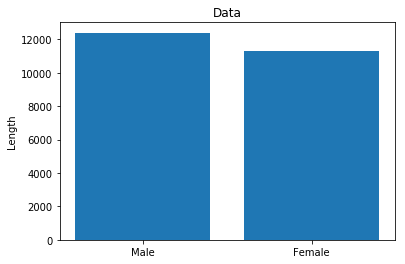

[12391, 11317]


In [11]:
describe_data(('Male', 'Female'), count)
print(count)

### Data Age

In [1]:
AGE_RANGE = ['(0, 2)', '(4, 6)', '(8, 13)', '(15, 20)', '(25, 32)', '(38, 43)', '(48, 53)', '(60, 100)']

In [17]:
def age_to_range(age):
    age = int(age)
    if age >= 0 and age <= 2:
        return 0
    elif age >= 4 and age <= 6:
        return 1
    elif age >= 8 and age <= 13:
        return 2
    elif age >= 15 and age <= 20:
        return 3
    elif age >= 25 and age <= 32:
        return 4
    elif age >= 38 and age <= 43:
        return 5
    elif age >= 48 and age <= 53:
        return 6
    elif age >= 60 and age <= 100:
        return 7
    else:
        return None

In [18]:
images_to_pkl(files=files, labels=labels, pos=0, name='age', max_batch=5000, callback=age_to_range)

In [19]:
age_data_range = glob('data/*.age.pkl')
batch_age_range = load(age_data_range[np.random.randint(len(age_data_range))])
age_range_x, age_range_y = len(batch_age_range['X']), len(batch_age_range['y'])
print(age_data_range)
print(age_range_x, age_range_y)
print(batch_age_range['X'][np.random.randint(age_range_x)])
print(batch_age_range['y'][np.random.randint(age_range_y)])

['data/03.age.pkl', 'data/02.age.pkl', 'data/01.age.pkl', 'data/04.age.pkl', 'data/05.age.pkl']
3530 3530
[[[0.8156863  0.7019608  0.60784316]
  [0.7882353  0.67058825 0.57254905]
  [0.80784315 0.6784314  0.5764706 ]
  ...
  [0.9529412  0.8392157  0.7764706 ]
  [0.9529412  0.8392157  0.7764706 ]
  [0.95686275 0.84313726 0.78039217]]

 [[0.81960785 0.7019608  0.60784316]
  [0.78431374 0.6627451  0.5686275 ]
  [0.8        0.67058825 0.5686275 ]
  ...
  [0.95686275 0.84313726 0.78039217]
  [0.9529412  0.8392157  0.7764706 ]
  [0.9529412  0.8392157  0.7764706 ]]

 [[0.8352941  0.7176471  0.62352943]
  [0.7882353  0.67058825 0.57254905]
  [0.8039216  0.67058825 0.5686275 ]
  ...
  [0.9607843  0.84705883 0.78431374]
  [0.95686275 0.84313726 0.78039217]
  [0.9490196  0.8352941  0.77254903]]

 ...

 [[0.85882354 0.6039216  0.5176471 ]
  [0.80784315 0.5568628  0.42352942]
  [0.8039216  0.56078434 0.36862746]
  ...
  [0.90588236 0.6745098  0.5137255 ]
  [0.92156863 0.6901961  0.53333336]
  [0.92

In [20]:
count = [0 for i in range(len(AGE_RANGE))]
for file in age_data_range:
    data = load(file)
    if data != None:
        for label in data['y']:
            count[label] += 1

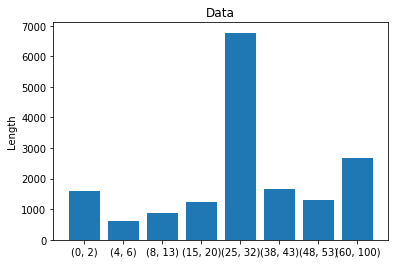

[1605, 600, 861, 1226, 6772, 1672, 1293, 2669]
16698


In [21]:
describe_data(AGE_RANGE, count)
print(count)
print(np.sum(count))

## Ethnicity

In [14]:
def validate(label):
    value = int(label)
    return None if value >= 5 else value

In [15]:
images_to_pkl(files, labels, 2, 'ethnicity', 5000, callback=validate)

In [16]:
ethnicity_data = glob('data/*.ethnicity.pkl')
batch_ethnicity = load(ethnicity_data[np.random.randint(len(ethnicity_data))])
ethnicity_x, ethnicity_y = len(batch_ethnicity['X']), len(batch_ethnicity['y'])
print(ethnicity_data)
print(ethnicity_x, ethnicity_y)
print(batch_ethnicity['X'][np.random.randint(ethnicity_x)])
print(batch_ethnicity['y'][np.random.randint(ethnicity_y)])

['data/05.ethnicity.pkl', 'data/01.ethnicity.pkl', 'data/02.ethnicity.pkl', 'data/03.ethnicity.pkl', 'data/04.ethnicity.pkl']
5001 5001
[[[0.05490196 0.01960784 0.        ]
  [0.10196079 0.0627451  0.03529412]
  [0.16078432 0.10588235 0.07450981]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.07843138 0.04313726 0.01568628]
  [0.13725491 0.09411765 0.07058824]
  [0.19215687 0.13725491 0.10588235]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.10980392 0.07058824 0.04705882]
  [0.1764706  0.13333334 0.10980392]
  [0.22745098 0.16862746 0.14117648]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 ...

 [[0.01568628 0.01568628 0.04705882]
  [0.00392157 0.         0.02745098]
  [0.01568628 0.00392157 0.01568628]
  ...
  [0.00392157 0.00392157 0.04313726]
  [0.00392157 

In [18]:
count = [0 for i in range(5)]
for file in ethnicity_data:
    data = load(file)
    if data != None:
        for label in data['y']:
            count[int(label)] += 1

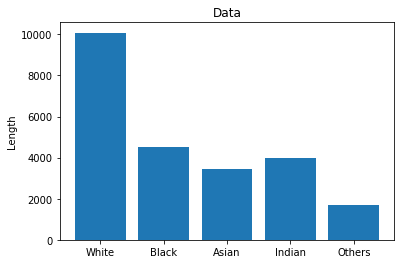

[10078, 4526, 3434, 3975, 1692]
23705


In [19]:
describe_data(('White', 'Black', 'Asian', 'Indian', 'Others'), count)
print(count)
print(np.sum(count))